In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)

df = pd.read_csv('./data_out/gpt-3.5-p3.csv')
df.replace(('YES', 'NO'), (1, 0), inplace=True)
df_labels = pd.read_csv('./data_out/human_labels.csv', delimiter=';')

In [2]:
res = {}
for i in range(38):
    pred = df[df['Paper'] == i]
    true = df_labels[df_labels['paper_id'] == i]
    
    paper_res = {}
    for col in pred:
        if col != 'Paper':
            paper_res[col] = pred[col].values[0] == true[col].values[0]
    res[i] = paper_res

df_res = pd.DataFrame.from_dict(res, orient='index')

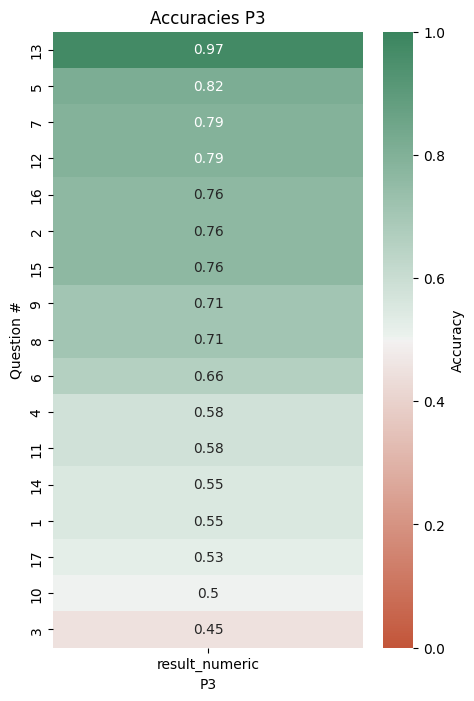

In [3]:
df_res = df_res.reset_index().rename(columns={"index":"paper_id"})		
df_test = df_res.melt(id_vars=['paper_id'], value_vars=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '19'], var_name='question', value_name='result')


df_test['result_numeric'] = df_test['result'].astype(int)
# Make sure question IDs align with Berend
df_test['question'] = df_test['question'].astype(int)
df_test['question'] += 1
df_test['question'] = df_test['question'].replace(20, 17)

percent_true_by_question = df_test.groupby('question')['result_numeric'].mean().reset_index()
percent_true_by_question = percent_true_by_question.sort_values(by='result_numeric', ascending=False)

plt.figure(figsize=(5, 8))
sns.heatmap(
    percent_true_by_question.set_index('question'),
    annot=True, 
    cmap=sns.diverging_palette(20, 145, as_cmap=True), 
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1
)
plt.title('Accuracies P3')
plt.xlabel('P3')
plt.ylabel('Question #')
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Accuracy')
plt.show()